# What is Uber Eats?
**Uber Eats** is an online food ordering and delivery platform. Users can read menus, reviews and ratings, order, and pay for food from participating restaurants using an application or through a web browser.


### Loading CSVs

In [9]:
import pandas as pd

In [10]:
pwd

'/Users/narinari/my project'

In [11]:
ubereats_menu = pd.read_csv(r"/Users/narinari/Downloads/restaurant-menus.csv")
ubereats = pd.read_csv(r"/Users/narinari/Downloads/restaurants.csv")

In [12]:
ubereats_menu.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [13]:
ubereats.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [14]:
print(ubereats_menu.shape)
print("-------------------------------------------")
print(ubereats_menu.info())

(403240, 5)
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403240 entries, 0 to 403239
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  403240 non-null  int64 
 1   category       403240 non-null  object
 2   name           403240 non-null  object
 3   description    316955 non-null  object
 4   price          403240 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.4+ MB
None


In [15]:
ubereats_menu.describe()

,restaurant_id
count,403240.000000
mean,2609.343344
std,1440.022540
min,1.000000
25%,1374.000000
50%,2686.000000
75%,3836.000000
max,5000.000000


In [16]:
print(ubereats_menu.columns)
print("----------------------------------")
print(ubereats_menu.index)

Index(['restaurant_id', 'category', 'name', 'description', 'price'], dtype='object')
----------------------------------
RangeIndex(start=0, stop=403240, step=1)


In [17]:
print(len(ubereats_menu['restaurant_id'].unique()))
print(len(ubereats_menu['name'].unique()))

4996
100631


In [18]:
ubereats_menu['name'].value_counts()[:10]

Bottled Water         742
French Fries          717
Onion Rings           659
Mozzarella Sticks     451
Tuna                  443
Buffalo Chicken       426
Iced Tea              410
Chocolate Milk        406
Cheeseburger          400
Steak &amp; Cheese    392
Name: name, dtype: int64

### Most common item 

In [19]:
# most item : top 10
item_count = ubereats_menu['name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("Top", idx, ":", val, cnt)

Top 1 : Bottled Water 742
Top 2 : French Fries 717
Top 3 : Onion Rings 659
Top 4 : Mozzarella Sticks 451
Top 5 : Tuna 443
Top 6 : Buffalo Chicken 426
Top 7 : Iced Tea 410
Top 8 : Chocolate Milk 406
Top 9 : Cheeseburger 400
Top 10 : Steak &amp; Cheese 392


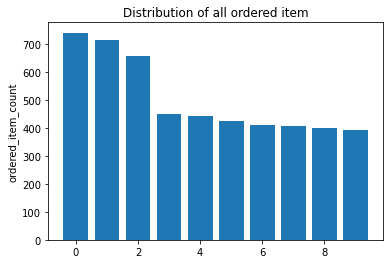

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_count.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_count.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [21]:
print(ubereats_menu.info())
print('-----------------')
ubereats_menu['price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403240 entries, 0 to 403239
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  403240 non-null  int64 
 1   category       403240 non-null  object
 2   name           403240 non-null  object
 3   description    316955 non-null  object
 4   price          403240 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.4+ MB
None
-----------------


0    15.99 USD
1    15.99 USD
2    14.99 USD
3    15.99 USD
4    14.99 USD
Name: price, dtype: object

In [22]:
ubereats_menu.loc[ubereats_menu['name'].str.contains('Pizza')]

,restaurant_id,category,name,description,price
145,2,Lunch,Waffle Pizza,"Pepperoni, ham, cheese, onions, and green pepp...",4.95 USD
551,14,Picked for you,Pepperoni Flatbread Pizza,"980 Cal. Thick sliced Pepperoni, fresh mozzare...",11.49 USD
580,14,You Pick Two,Flatbread Pizza and Flatbread Pizza,Selection of any two Flatbread Pizzas,0.0 USD
581,14,You Pick Two,Flatbread Pizza and Soup/Mac,Selection of a flatbread pizza and a half soup,0.0 USD
582,14,You Pick Two,Flatbread Pizza and Sandwich,Selection of a flatbread pizza and a half sand...,0.0 USD
...,...,...,...,...,...
402484,4994,Sandwiches,Pizza Sub Footlong Regular Sub,"Hot outta the oven, it’s the Pizza Sub. Enjoy ...",9.99 USD
402485,4994,Sandwiches,Pizza Sub Footlong Pro (Double Protein),"Hot outta the oven, it’s the Pizza Sub. Enjoy ...",14.51 USD
402532,4994,No Bready Bowls™,Pizza Sub,"We made pizza into a sub, then made that into...",9.99 USD
402561,4994,Wraps,Pizza Sub,"Hot outta the oven, it’s the Pizza Sub Wrap. E...",9.99 USD


In [23]:
ubereats_menu.loc[ubereats_menu['name'].str.contains('Chicken')]

,restaurant_id,category,name,description,price
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
6,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon Slice,NaN,3.99 USD
10,1,Jumbo Wings,Jumbo Chicken Wings Five Pieces,NaN,8.99 USD
11,1,Jumbo Wings,Jumbo Chicken Wings Seven Pieces,NaN,10.99 USD
12,1,Jumbo Wings,Jumbo Chicken Wings Nine Pieces,NaN,12.99 USD
...,...,...,...,...,...
403230,5000,Little Wrangler's Corral,Chicken Tenders,NaN,3.65 USD
403236,5000,Chicken Buckets,Chicken Only (16 pcs),NaN,23.25 USD
403237,5000,Chicken Buckets,Chicken with Meal (8 pcs),"Served with potatoes, slaw, and rolls.",18.75 USD
403238,5000,Chicken Buckets,Chicken with Meal (12 pcs),"Served with potatoes, slaw, and rolls.",24.55 USD


In [24]:
ubereats_merge = pd.merge(ubereats, ubereats_menu, left_on='id', right_on='restaurant_id')
ubereats_merge.head()

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,name_y,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [25]:
bestmenu = ubereats_merge.groupby('name_y').count().sort_values(by = 'id', ascending=False).head(20)
bestmenu

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,description,price
name_y,,,,,,,,,,,,,,,
Bottled Water,742,742,742,474,474,742,666,741,741,742,742,742,742,210,742
French Fries,717,717,717,306,306,717,629,712,712,717,717,717,717,228,717
Onion Rings,659,659,659,225,225,659,576,658,658,659,659,659,659,285,659
Mozzarella Sticks,451,451,451,200,200,451,399,451,451,451,451,451,451,331,451
Tuna,443,443,443,138,138,443,440,443,443,443,443,443,443,432,443
Buffalo Chicken,426,426,426,112,112,426,418,425,425,426,426,426,426,424,426
Iced Tea,410,410,410,180,180,409,387,408,408,410,410,410,410,184,410
Chocolate Milk,406,406,406,197,197,406,394,404,404,406,406,406,406,180,406
Cheeseburger,400,400,400,192,192,400,355,394,394,400,400,400,400,260,400


### Most popular restaurants

In [26]:
# Most popular restaurant
popular_restaurant = ubereats.sort_values(['score','ratings'], ascending=False)
popular_restaurant.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
2105,2106,188,Colectivo Prospect,5.0,103.0,"Coffee and Tea, American, Breakfast and Brunch",$,"2211 North Prospect Avenue, Milwaukee, WI, 53202",53202,43.059145,-87.885167
3096,3097,25,Michelangelo's Coffee House,5.0,51.0,"Coffee and Tea, Bakery, Juice and Smoothies, A...",$,"114 State Street, Madison, WI, 53703",53703,43.075016,-89.387200
2511,2512,12,Crumbl Cookies (WI - Oak Creek),5.0,45.0,"Desserts, Coffee and Tea",$,"160 w town square way, oak creek, WI, 53154",53154,42.900540,-87.914760
3140,3141,23,Yummee,5.0,45.0,"American, Desserts, Coffee and Tea",$$,"5510 University Avenue, Madison, WI, 53705",53705,43.083090,-89.475560
964,965,7,"Baskin-Robbins (5000 Whitesburg Dr S, Suite 156)",5.0,42.0,"Desserts, Ice Cream + Frozen Yogurt, Comfort Food",$,"5000 Whitesburg Dr SW, Huntsville, AL, 35802",35802,34.690520,-86.569150


In [27]:
import seaborn as sns
import plotly.express as px

In [29]:
fig = px.scatter(popular_restaurant, x="score", y="ratings",
     size_max=45, log_x=True, template='plotly_white')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [102]:
# How many ordered "Asian" food
ubereats_asian = ubereats[ubereats['category'] == "Asian"]
ubereats_asian = ubereats_asian.drop_duplicates(['category', 'id']) # drop the duplicate in one order

print(len(ubereats_asian))
ubereats_asian.head(5)

2


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
1725,1726,49,Pho Ever,4.4,38.0,Asian,$$,"5740 S 108th St, Hales Corners, WI, 53130",53130,42.940025,-88.047709
2000,2001,75,No 1 Chinese Restaurant (4501 N Oakland Ave),4.5,160.0,Asian,NaN,"4501 N Oakland Ave, Shorewood, WI, 53211",53211,43.098410,-87.887660


### Hypothesis

H₀: There is no relation between the review rating, score and food price.

Hₐ: There is a relation between the review rating, score and food price.

In [30]:
def overall_score(row):
    return row['score'] * row['ratings']    

In [31]:
ubereats["score"].fillna(0, inplace=True)
ubereats["ratings"].fillna(0, inplace=True)

In [32]:
fresh_ubereats = ubereats[["score","ratings","price_range"]].dropna()

In [33]:
fresh_ubereats.shape[0]

4419

In [34]:
fresh_ubereats['price_range'].unique()

array(['$', '$$', '$$$', '$$$$'], dtype=object)

In [35]:
# creating a "overall_score" column from ratings*score
fresh_ubereats['overall_score'] = fresh_ubereats.apply(overall_score, axis=1)

In [36]:
fresh_ubereats['price_range'].replace({'$':1, '$$$':3, '$$':2, '$$$$':4}, inplace=True)

In [37]:
# changing data type of the 'zip_code' column
# fresh_restaurants_df.astype({"zip_code":int})

fresh_ubereats.head()

,score,ratings,price_range,overall_score
0,0.0,0.0,1,0.0
2,0.0,0.0,1,0.0
3,0.0,0.0,1,0.0
5,0.0,0.0,2,0.0
6,4.7,63.0,1,296.1


In [38]:
corr = fresh_ubereats[['ratings',"overall_score", "price_range"]].corr()
corr

,ratings,overall_score,price_range
ratings,1.000000,0.997556,-0.223771
overall_score,0.997556,1.000000,-0.225314
price_range,-0.223771,-0.225314,1.000000


<AxesSubplot:>

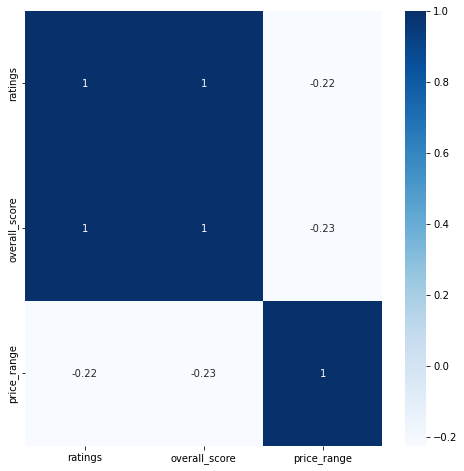

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="Blues",annot=True)

Price Range and Overall Score are negatively co-related which tells us that overall score gets with decreasing the price range. 

That means popular restaurants will not be very expensive.